<a href="https://colab.research.google.com/github/HongWonSeok/STUDY/blob/main/%EB%AA%A8%EB%91%90%EB%A5%BC_%EC%9C%84%ED%95%9C_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EC%8B%9C%EC%A6%8C2_LAB_09-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**모두를 위한 딥러닝 시즌2 with Pytorch - LAB 09**



1. Weight initialization
2. Dropout
3. Batch Normalization

#Weight initialization

- Why good initialization
- RBM /DBN
- Xavier / He initialization
- Code : mnist_nn_xavier
- Code : mnist_nn_deep

Geoffery Hinton님이 우리가 여태까지 했던 wieght initializing은 굉장이 멍청한 방법으로 하고있었다는 말을했다. 이말은 즉슨 weight를 잘 초기화를 해야하는데 지금까지는 무작위로 해버렸다는 것이 문제라는 것이다.

그러면 어떻게 initializing을 해야하나!
- Not all 0's : backpropagation 알고리즘을할때 gredient를 계산하여 chain rule로 업데이트를 할때 weight가 0 이면 모두 0이되므로 안됨!
- Hinton et al.(2006) "A Fast Learning Algorithm for Deep Belief Nets" - Restricted Boltzmann Machine(RBM)
 - RBM을 이용해서 Deep Neural Network를 weight initializing을하고나서 학습을하면 성능이 더 올라간다는 논문이다.



**RBM**

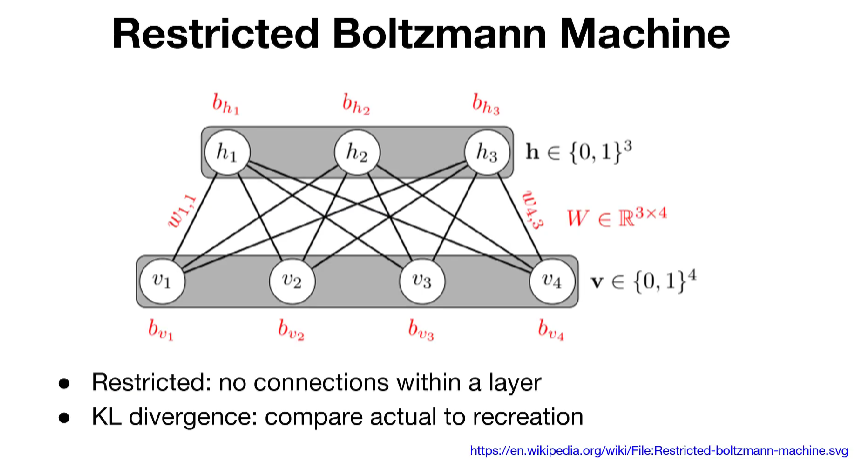

Restricted : no connections within a layer - 레이어 안에서는 연결이 없다.(한 레이어안에있는 노드들끼리는 연결이 없다.) 그렇지만 다른layer사이에서는 전부다 연결이 되어있다.

이 머신이 하는일 - 입력 x가 들어갔을떄 Y를 만드는 forward가 있고, 반대로 Y가들어왔을때 X를복원하는 x'을 만들수있다.(인코딩, 디코딩으로 생각을 할수도있다.)

// RBM을 어떻게 initailizing에 사용했을까
- pre-training step

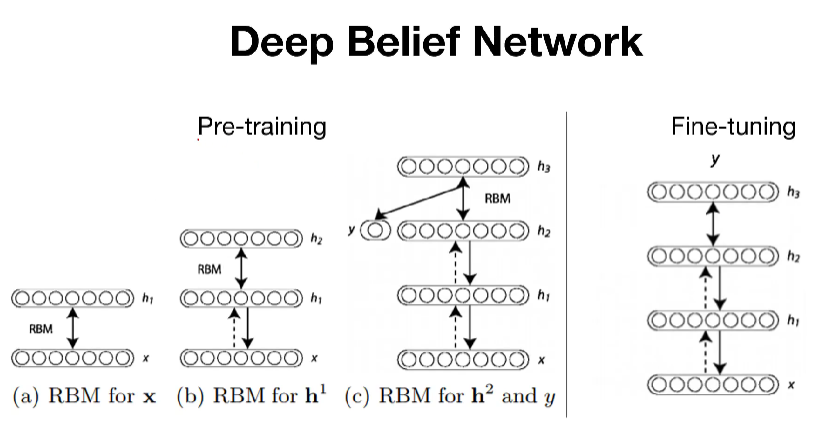

Xavier / He initialization
- RBM을 이용해서 Pre-training을 거치는 방법이 아니라 간단하게 weight를 초기화 할수 있는 방법

- layer에 특성에따라 다르게 initialization을 해야한다

Xavier
- Xavier Normal initialization
 - 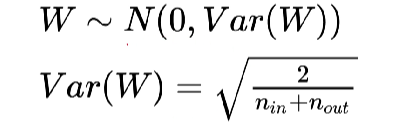

- Xavier Uniform initialization
 - 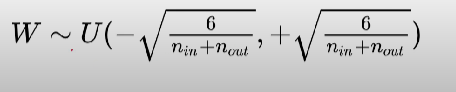

He initialization

- He Normal initialization
 - 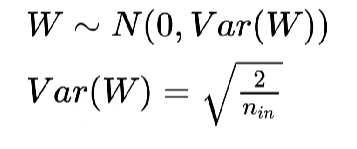

- He Uniform initialization
 - 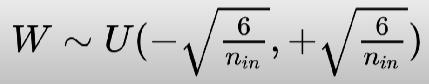

CODE : mnist_nn_xavier
- pytorch로 어떻게 initialization을 구현할지 pytorch 패키지에 있는 공식코드에있는 구현을 살펴보자

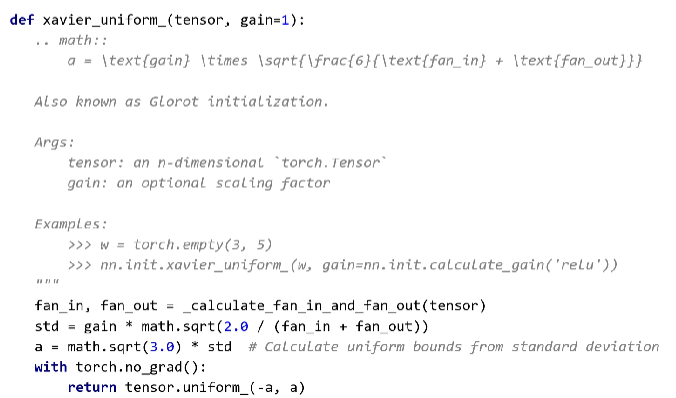

fan_in과 fan_out이 n(in)과 n(out)이라고 보면된다. 이것은 초기화하고자 하는 layer의 input수와 output수라고 생각하면된다.

- 실제 Xavier weight initialization방식을 적용한 코드

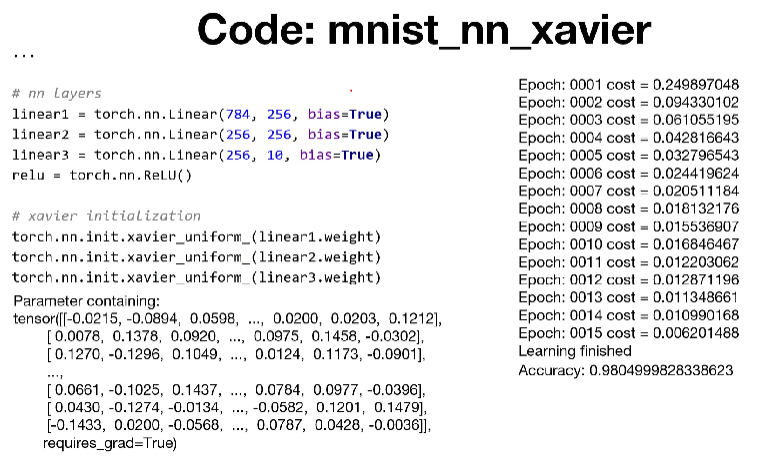

조금더 deep 하게 layer를 쌓아본다

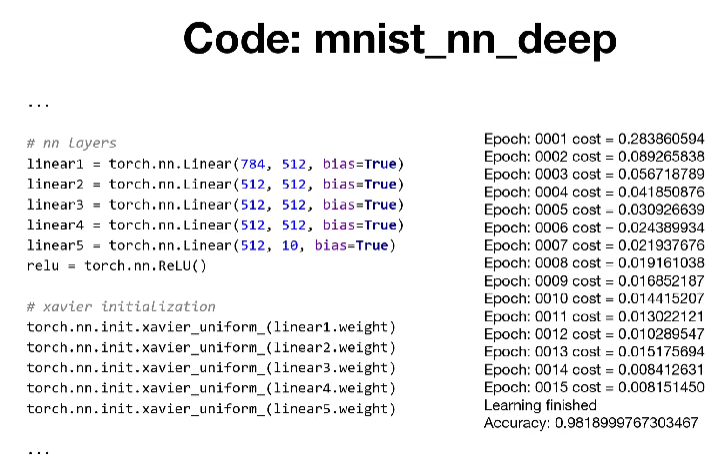

#Dropout

- Overfitting
- Dropout
- Code : mnist_nn_dropout

**Overfitting**

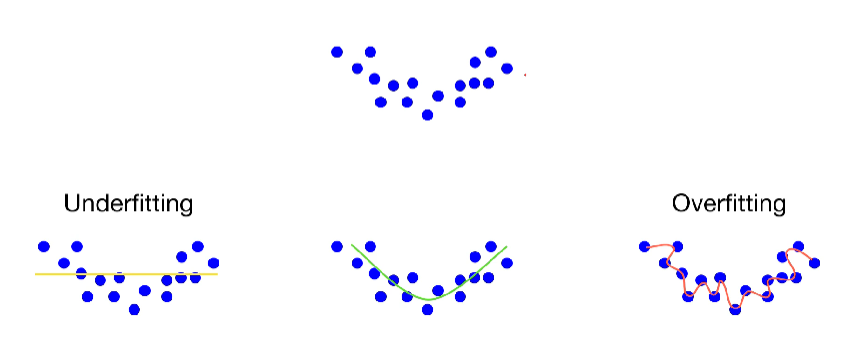

Underfitting에경우에는 학습이 덜됐고, 학습을 할수없는 너무 낮은차원을 사용한다고 할수있고, Overfitting은 너무 파란색데이터에만 fitting이 되어있고, 너무 고차원의 모델을 사용했다고 할 수 있다.

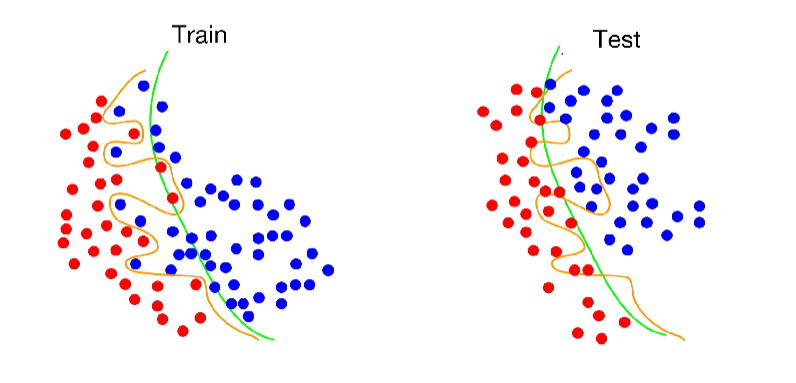

위의 그림과 같이 주황색 선 같은경우에는 Train set에 서 정확도가 100%로 정말 괜찮은 모델같지만 Test set을 보게되면 정확도가 확 낮아지는 것을 볼 수있다. 하지만 초록색 선을 보게되면 Train set에서 100%의 정확도를 가지고 있지는 않지만 Test set에서보면 만족할만한 훌륭한 정확도를 가지고 있다 그러므로 주확색 선은 Overfitting이 됐다고 할 수 있다.

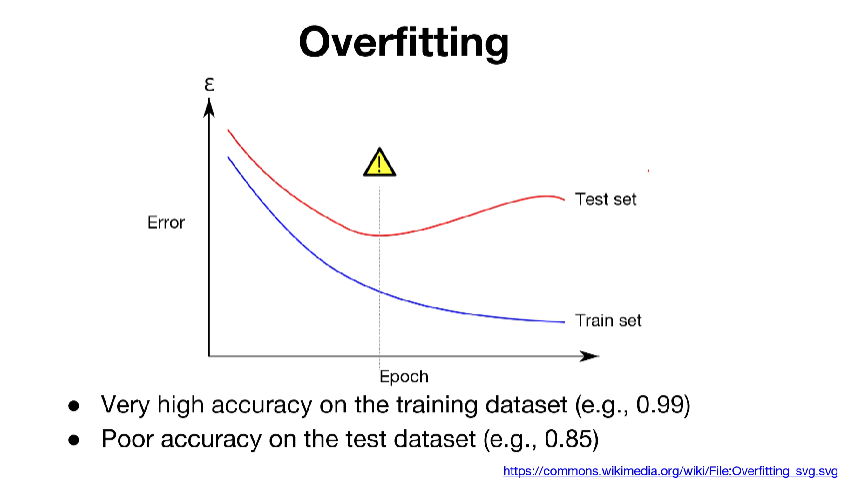

그래서 Overfitting이 되게되면 위에 사진에서 보이는 것과 같이 train data set에서는 Error rate가 굉장히 낮은 수치를 가지고있지만 Test data set에서는 Error rate가 높고 정확도가 떨어지는 모습을 보이다.

Dropout

- solution for overfitting

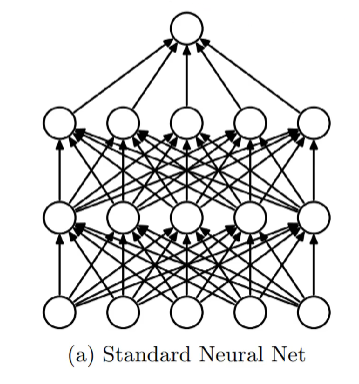
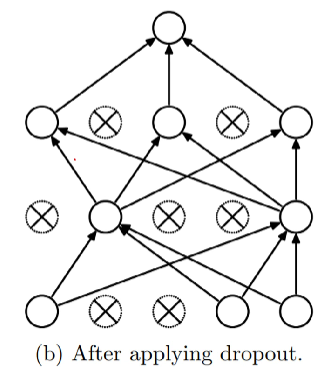

우선 왼쪽 사진처럼 평범한 뉴럴네트워크를 학습할때, 데이터가 입력으로 들어오면 weight와 activation을 반복하며 output을 만들고 이것을 실제데이터(Ground truth)와의 차이로 loss를 계산후 backpropagation방식으로 weight를 업데이트를 한다.

오른쪽그림은 **dropout방식**이다. drop out이란 학습을 진행하면서 각 layer에 존재하는 node(뉴런)들을 특정 설정된 비율만큼 무작위로 켰다껐다를 반복하는 방식이다. 그렇게 해서 위의 사진처럼 X표시된 노드를 무작위로 사용하지않고 나머지를 사용하여 학습을 진행한다.

이걸 사용하게되면 overfitting을 방지하고 성능을 향상시킬 수도있다. 매번 다른 구조로 학습시키기 때문에 네트워크 앙상블의 효과도 낼수있다고 한다.

CODE 

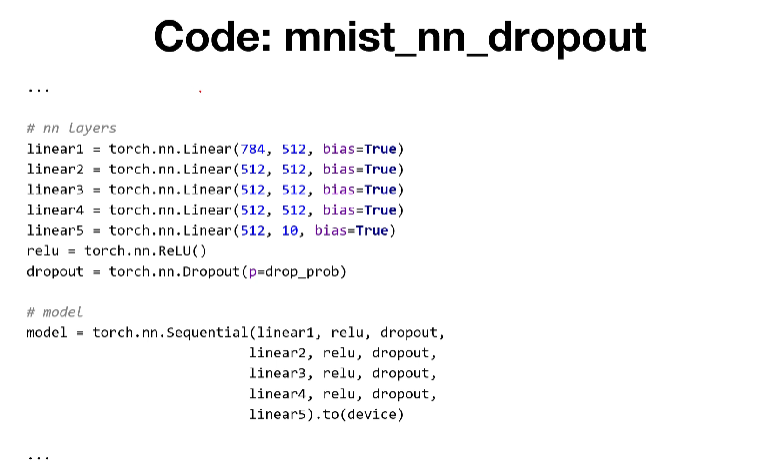

p는 무작위 확률이다.

**dropout주의사항**
- 학습할때는 무작위로 노드들을 선택해서 사용하지만 실제 testset에 사용할때는 모든노드를 사용해서 학습을한다. 그래서 evaluation mode와 train mode를 주의해서 사용한다.
- model.train()을 사용하면 모델안에 있는 모든 dropout은 적용하겠다. 미리적용한 비율에 따라 사용하겠다는 것이다.
- model.eval()을 사용하면 전체노드를 사용하겠다 라는 것이다. 그래서 test를 할때 이것을 선언해야한다.


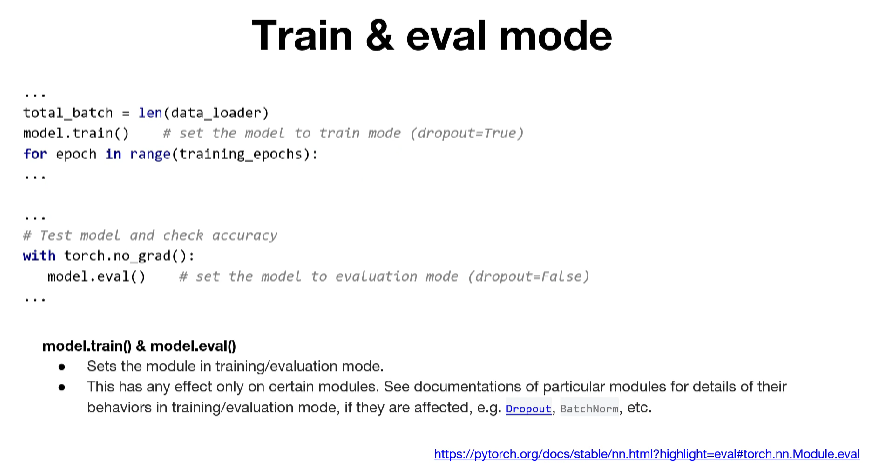

#**Batch Normalization**

- Gradient Vanishing / Exploding
- Internal Covariate Shift
- Batch Normalization
- Code : mnist_batchnorm

Gradient Vanishing / Exploding

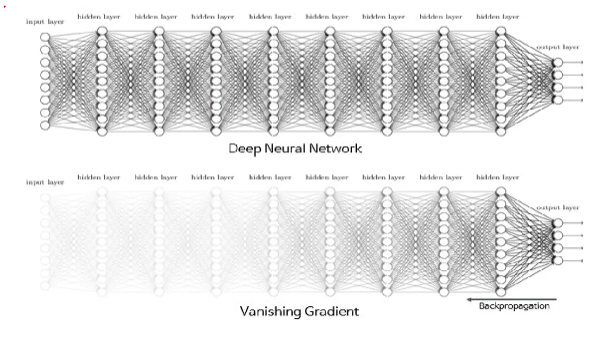

solution
- Change activation function
- Careful initalization(Weight 초기화를 잘해보자!)
- Small learning rate(Gradient Exploding의 해결책)


Batch Normalization
- 직접적인 solution
- 학습과정이 안정화되고, 학습속도의 가속 등 여러 이점이있다.

**Internal Covariate Shift**
-  train set과 test set의 분포가 실제로 차이가 난다. 이것이 문제를 발생 시킨다라는 개념!

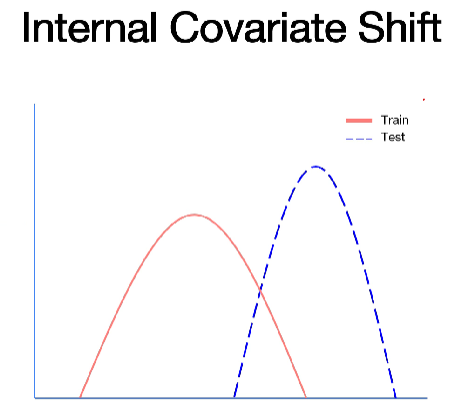